In [29]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
sns.set()
sns.set_style('white')

### Data Loading 

In [30]:
data_path = '../data/data_by_group/'
data_list = ['1','2','3','4','5']
start_date = '2005-01-01'
end_date = '2020-03-26'

In [71]:
def load_data(file_path,rating_class,start_date,end_date):
    path = file_path+str(rating_class)+'/'
    files = os.listdir(path)
    output_path='../data/rating_class_%s.csv'%str(rating_class)
    result_df = None
    for i in range(len(files)):
        data_path = path+files[i]
        temp_df = pd.read_csv(data_path, index_col=0, parse_dates=True)

        temp_df = temp_df[start_date:end_date]

        result_df=pd.concat([result_df, temp_df], axis=1)
    
    result_df /= 100
    result_df = result_df.sort_index(axis=1)
    result_df.to_csv(output_path, index=True)
    
    return result_df

In [72]:
rating_1_df = load_data(data_path,1,start_date,end_date)
rating_2_df = load_data(data_path,2,start_date,end_date)
rating_3_df = load_data(data_path,3,start_date,end_date)
rating_4_df = load_data(data_path,4,start_date,end_date)
rating_5_df = load_data(data_path,5,start_date,end_date)

In [73]:
rating_5_df.sort_index(axis=1).describe()

Askari Bank Ltd  Beh-Property Co Ltd  \
count      5564.000000          3301.000000   
mean          2.467886             2.809835   
std           3.668724             1.208097   
min           0.036502             0.865452   
25%           0.693871             1.873456   
50%           1.280532             2.427885   
75%           2.829554             3.617415   
max          29.965894             6.659086   

       Beijing Homyear Capital Holdings Co Ltd  \
count                              5151.000000   
mean                                  2.653995   
std                                   7.985152   
min                                   0.550586   
25%                                   1.007672   
50%                                   1.355915   
75%                                   2.055721   
max                                  84.966465   

       Beijing Zodi Investment Co Ltd  CBL & Associates Properties Inc  \
count                     5472.000000                      5564.000000   
mean                         0.629649                         0.410819   
std                          0.753539                         0.955717   
min                          0.063788                         0.000182   
25%                          0.292255                         0.006024   
50%                          0.464565                         0.047202   
75%                          0.750557                         0.279828   
max                          7.232156                         9.441145   

       DongfengSci-Tech Group Co Ltd  Ecobank Transnational Inc  \
count                    4694.000000                4563.000000   
mean                        5.268416                   2.084630   
std                         5.765163                   1.665164   
min                         0.379327                   0.000003   
25%                         1.283471                   1.037773   
50%                         3.783549                   1.516587   
75%                         5.853763                   2.575002   
max                        38.663949                  10.748055   

       Ecsponent Ltd  FlexiGroup Ltd/Australia  \
count    4562.000000               4564.000000   
mean        0.568032                  0.437411   
std         0.757421                  0.654169   
min         0.014499                  0.018954   
25%         0.134542                  0.060113   
50%         0.310771                  0.189281   
75%         0.770328                  0.572073   
max         7.535293                 10.055934   

       Harbin Gong Da High-Tech Enterprise Development Co Ltd  \
count                                        4149.000000        
mean                                            1.924135        
std                                             2.470405        
min                                             0.419507        
25%                                             0.819036        
50%                                             1.166869        
75%                                             1.709109        
max                                            13.933280        

       Intu Properties PLC  Jahangir Siddiqui & Co Ltd  \
count          5563.000000                 5564.000000   
mean              0.178675                    1.470102   
std               0.730012                    1.453731   
min               0.000507                    0.005685   
25%               0.017192                    0.466476   
50%               0.037932                    1.095655   
75%               0.158418                    1.924415   
max              13.256325                   13.416315   

       Jilin Cheng Cheng Group Co Ltd  Metro Land Corp Ltd  Resimac Group Ltd  \
count                     5438.000000          5564.000000        5463.000000   
mean                         4.672966             3.439739           0.658408   
std                          3.771809             1.265080

In [74]:
rating_5_df.isnull().sum()

Askari Bank Ltd                                              0
Beh-Property Co Ltd                                       2263
Beijing Homyear Capital Holdings Co Ltd                    413
Beijing Zodi Investment Co Ltd                              92
CBL & Associates Properties Inc                              0
DongfengSci-Tech Group Co Ltd                              870
Ecobank Transnational Inc                                 1001
Ecsponent Ltd                                             1002
FlexiGroup Ltd/Australia                                  1000
Harbin Gong Da High-Tech Enterprise Development Co Ltd    1415
Intu Properties PLC                                          1
Jahangir Siddiqui & Co Ltd                                   0
Jilin Cheng Cheng Group Co Ltd                             126
Metro Land Corp Ltd                                          0
Resimac Group Ltd                                          101
Soneri Bank Ltd                                        

In [75]:
rating_2_df.count()

1st Constitution Bancorp             5564
A Brown Co Inc                       5123
American National Insurance Co       5564
BNC Bancorp                          4552
CRED Holding Co Ltd                  4856
Commonwealth Bank of Australia       5564
FRACTALE Corp                        5355
First Commonwealth Financial Corp    5564
Fonciere Atland                      4948
Fragrance Group Ltd                  5322
Glen Burnie Bancorp                  5564
HSBC Holdings PLC                    5563
Hang Seng Bank Ltd                   5564
Hitachi Capital Corp                 5564
Joindre Capital Services Ltd         4470
Jordan French Insurance              5139
Panther Securities PLC               5555
Prudential Bancorp Inc               5384
Public Bank Bhd                      5564
Southside Bancshares Inc             5564
dtype: int64

### Data Characteristic 

In [76]:
#Plot Average level of Default Probabilits in the data sef
comb_data = pd.concat([rating_1_df,rating_2_df,rating_3_df,rating_4_df,rating_5_df],axis=1)
average_all_level = comb_data.mean(axis=1)

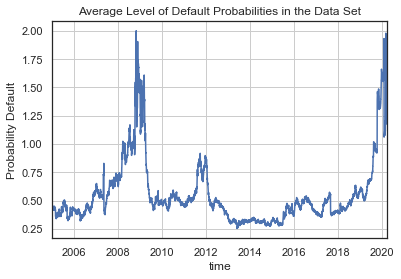

In [77]:
average_all_level.plot()
plt.title('Average Level of Default Probabilities in the Data Set')
plt.ylabel('Probability Default')
plt.xlabel('time')
plt.grid()
plt.show()

In [95]:
#plot Avarage Level of Defaut Probabilities in Each Rating Class
final_data = None
for i in range(1,6):
    col_name = 'Rating '+str(i)
    data_df = pd.DataFrame(data=(comb_data.iloc[:,(i-1)*20:20*i ]).mean(axis=1),columns=[col_name])
#     data_df.rename(columns={data_df.columns[0]:col_name})
#     data_df = data_df.mean(axis=1)
    final_data = pd.concat([final_data,data_df],axis=1)


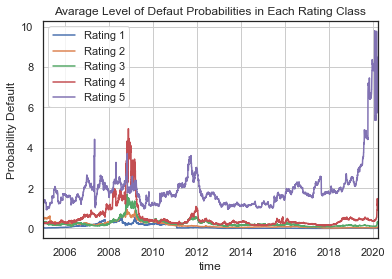

In [96]:
final_data.plot()
plt.title('Avarage Level of Defaut Probabilities in Each Rating Class')
plt.ylabel('Probability Default')
plt.xlabel('time')
plt.grid()
plt.legend()
plt.show()

In [97]:
final_data.apply(min).T

Rating 1    0.002647
Rating 2    0.019874
Rating 3    0.075640
Rating 4    0.137112
Rating 5    0.933797
dtype: float64

In [98]:
def describe_data(data_df):
    col_name = ['Min','Max','Mean','Std','Skew','Kurtosis']
    lomo_df = pd.DataFrame(data_df.count().T,columns=['Count'])
    for function in col_name:
        lomo_df[function] = data_df.apply(str.lower(function))
    return lomo_df

In [99]:
level_df = describe_data(final_data)
level_df

Count       Min       Max      Mean       Std      Skew   Kurtosis
Rating 1   5564  0.002647  0.570709  0.085817  0.111849  1.428162   1.175333
Rating 2   5564  0.019874  0.945709  0.172905  0.165632  1.676902   2.697000
Rating 3   5564  0.075640  1.687642  0.253374  0.206486  3.254135  12.589380
Rating 4   5564  0.137112  4.946971  0.509253  0.556647  3.870429  17.656244
Rating 5   5564  0.933797  9.802760  1.945529  1.079684  3.565675  15.451609

In [100]:
change_df = final_data.diff().apply(np.abs).dropna(axis=0)
change_df_summary = describe_data(change_df)
change_df_summary

Count  Min       Max      Mean       Std       Skew    Kurtosis
Rating 1   5563  0.0  0.192507  0.001824  0.006482  14.749452  348.534326
Rating 2   5563  0.0  0.204286  0.002867  0.008108  10.780768  192.108623
Rating 3   5563  0.0  0.253251  0.007683  0.013533   6.369848   66.716232
Rating 4   5563  0.0  1.390920  0.017724  0.056381   9.867982  142.561597
Rating 5   5563  0.0  4.434932  0.027456  0.125006  24.318841  721.452031

### kendall's tau

In [257]:
#for PD levels
final_data.loc[:'20160101'].corr(method='kendall')

Rating 1  Rating 2  Rating 3  Rating 4  Rating 5
Rating 1  1.000000  0.573570  0.392771  0.616240  0.363635
Rating 2  0.573570  1.000000  0.476130  0.444884  0.263897
Rating 3  0.392771  0.476130  1.000000  0.398255  0.272118
Rating 4  0.616240  0.444884  0.398255  1.000000  0.417902
Rating 5  0.363635  0.263897  0.272118  0.417902  1.000000

In [111]:
#for PD changes
change_df.corr(method='kendall')

Rating 1  Rating 2  Rating 3  Rating 4  Rating 5
Rating 1  1.000000  0.644163  0.234810  0.376230  0.497788
Rating 2  0.644163  1.000000  0.238094  0.342255  0.481311
Rating 3  0.234810  0.238094  1.000000  0.418443  0.140350
Rating 4  0.376230  0.342255  0.418443  1.000000  0.289461
Rating 5  0.497788  0.481311  0.140350  0.289461  1.000000

### Asymmetric correlation for every pair of rating classed in the data 

In [113]:
data_df = final_data

In [115]:
data_df

Rating 1  Rating 2  Rating 3  Rating 4  Rating 5
Date                                                        
2005-01-01  0.030073  0.526499  0.275415  0.275184  1.361246
2005-01-02  0.030073  0.526499  0.299198  0.300856  1.361246
2005-01-03  0.030624  0.528098  0.282873  0.272865  1.360736
2005-01-04  0.031116  0.522179  0.292239  0.274970  1.362739
2005-01-05  0.031410  0.496568  0.297334  0.287285  1.319921
2005-01-06  0.030541  0.503274  0.295156  0.280416  1.307660
2005-01-07  0.031319  0.494884  0.289033  0.268646  1.306360
2005-01-08  0.031319  0.494884  0.303663  0.293552  1.306360
2005-01-09  0.031319  0.494884  0.315464  0.293552  1.306360
2005-01-10  0.030955  0.481735  0.299606  0.271021  1.287244
2005-01-11  0.030764  0.483986  0.288833  0.277631  1.270332
2005-01-12  0.030690  0.483837  0.297001  0.278914  1.265656
2005-01-13  0.031514  0.486427  0.302486  0.266766  1.263287
2005-01-14  0.030988  0.494694  0.293803  0.266939  1.275890
2005-01-15  0.030988  0.494694  0.308611  0.291373  1.275890
2005-01-16  0.030988  0.494694  0.320082  0.291373  1.275890
2005-01-17  0.030662  0.493818  0.290884  0.261543  1.273611
2005-01-18  0.030047  0.506971  0.304746  0.260953  1.283752
2005-01-19  0.029536  0.483953  0.287338  0.253893  1.316493
2005-01-20  0.030529  0.491863  0.286676  0.252521  1.351753
2005-01-21  0.030355  0.495421  0.277908  0.252446  1.385840
2005-01-22  0.030355  0.495421  0.277908  0.252446  1.385840
2005-01-23  0.030355  0.495421  0.288005  0.252446  1.385840
2005-01-24  0.031337  0.487378  0.294381  0.255572  1.376669
2005-01-25  0.030559  0.510634  0.291891  0.255054  1.353549
2005-01-26  0.029808  0.493027  0.279907  0.255410  1.366128
2005-01-27  0.030060  0.515467  0.281438  0.253854  1.365007
2005-01-28  0.030450  0.541462  0.281969  0.253479  1.367500
2005-01-29  0.030450  0.541462  0.296228  0.277065  1.367500
2005-01-30  0.030450  0.541462  0.307007  0.277065  1.367500
...              ...       ...       ...       ...       ...
2020-02-26  0.003116  0.037173  0.117696  0.481531  5.474773
2020-02-27  0.003488  0.038291  0.126733  0.487140  5.501073
2020-02-28  0.003929  0.040083  0.133943  0.514440  5.934394
2020-02-29  0.003929  0.040083  0.133943  0.514440  5.934394
2020-03-01  0.003929  0.040083  0.133943  0.514440  5.934394
2020-03-02  0.003467  0.037886  0.132076  0.525276  5.758865
2020-03-03  0.003508  0.037746  0.129901  0.526870  5.762557
2020-03-04  0.003384  0.037416  0.131162  0.531593  5.924903
2020-03-05  0.003641  0.037607  0.133314  0.536838  9.773653
2020-03-06  0.004023  0.037313  0.137246  0.565942  5.711478
2020-03-07  0.004023  0.037313  0.137246  0.565942  5.711478
2020-03-08  0.004023  0.037313  0.137246  0.565942  5.711478
2020-03-09  0.005420  0.047479  0.166186  0.679229  6.117376
2020-03-10  0.005424  0.046221  0.161841  0.679091  6.044521
2020-03-11  0.006258  0.047689  0.173788  0.724618  6.254448
2020-03-12  0.008655  0.057201  0.213418  0.907713  6.534856
2020-03-13  0.007156  0.053631  0.232205  0.904471  6.453390
2020-03-14  0.007156  0.053631  0.236935  0.904471  6.453390
2020-03-15  0.007156  0.053631  0.236935  0.904471  6.453390
2020-03-16  0.010874  0.062945  0.270644  1.041954  6.791622
2020-03-17  0.009080  0.058617  0.268466  1.135199  6.957508
2020-03-18  0.010685  0.064547  0.309843  1.480557  7.667225
2020-03-19  0.009496  0.067989  0.319622  1.193759  7.741841
2020-03-20  0.010012  0.065916  0.301271  1.126250  7.586028
2020-03-21  0.010012  0.065916  0.301271  1.126250  7.586028
2020-03-22  0.010012  0.065916  0.301271  1.126250  7.586028
2020-03-23  0.013059  0.070294  0.339950  1.225934  8.385366
2020-03-24  0.010441  0.063089  0.286245  1.179666  8.483292
2020-03-25  0.009107  0.059895  0.251217  1.051549  8.189710
2020-03-26  0.007237  0.060449  0.244088  0.977983  7.961527

[5564 rows x 5 columns]

In [116]:
data_df = (data_df - data_df.mean())/data_df.std()

In [161]:
def get_quantile_df(group_1, group_2, exceedance_level):
    if exceedance_level < 0.5:
        return data_df.loc[(data_df[group_1] < data_df[group_1].quantile(exceedance_level)) & (data_df[group_2] < data_df[group_2].quantile(exceedance_level)), [group_1, group_2]]
    elif exceedance_level > 0.5:
        return data_df.loc[(data_df[group_1] > data_df[group_1].quantile(exceedance_level)) & (data_df[group_2] > data_df[group_2].quantile(exceedance_level)), [group_1, group_2]]
    elif exceedance_level == 0.5:
        a = data_df.loc[(data_df[group_1] < data_df[group_1].quantile(exceedance_level)) & (data_df[group_2] < data_df[group_2].quantile(exceedance_level)), [group_1, group_2]]
        b = data_df.loc[(data_df[group_1] > data_df[group_1].quantile(exceedance_level)) & (data_df[group_2] > data_df[group_2].quantile(exceedance_level)), [group_1, group_2]]
        return a, b

In [142]:
initial_data_df = data_df.copy()

In [192]:
def asymmetric_corr(data_df):
    rating_class = data_df.columns
    count = 0

    plt.figure(figsize=(20,20))
    for i in range(len(rating_class)):

        for m in range(i+1,len(rating_class)):
            result_list = []
            rating_1 = data_df[rating_class[i]]
            rating_2 = data_df[rating_class[m]]
            title = rating_class[i] + ' & ' + rating_class[m]
            for q in np.arange(0.1,1,0.1):
                if q == 0.5:
                    a, b = get_quantile_df(rating_class[i], rating_class[m], q)
                    result_list.append(a.corr().values[0][1])
                    result_list.append(b.corr().values[0][1])
                else:
                    result_list.append(get_quantile_df(rating_class[i], rating_class[m], q).corr().values[0][1])
            count +=1
            loc= int(str(33)+str(count))
            if count==10:
                plt.figure(figsize=(4,4))
            else:
                plt.subplot(loc)
#             plt.plot(np.arange(0.1,1,0.1),result_list)
            plt.plot(list(np.arange(0.1,0.6,0.1)) + list(np.arange(0.5,1,0.1)), np.abs(result_list), '*-')
            plt.title(title)
            plt.xlabel('Exceedance Level')
            plt.ylabel('Conditional Probability')

In [253]:
# data_df = initial_data_df.loc[:'20160101', :]
data_df = initial_data_df

In [247]:
data_df.tail()

Rating 1  Rating 2  Rating 3  Rating 4  Rating 5
Date                                                        
2015-12-28 -0.690533 -0.530803 -0.346197 -0.462666 -0.459140
2015-12-29 -0.692919 -0.535192 -0.370854 -0.461777 -0.449250
2015-12-30 -0.691244 -0.532407 -0.375540 -0.454333 -0.445223
2015-12-31 -0.692297 -0.559392 -0.387407 -0.450081 -0.443958
2016-01-01 -0.692297 -0.559519 -0.387407 -0.453323 -0.448915

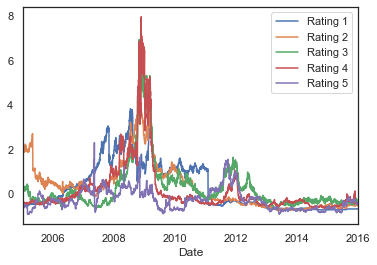

In [205]:
data_df.plot()

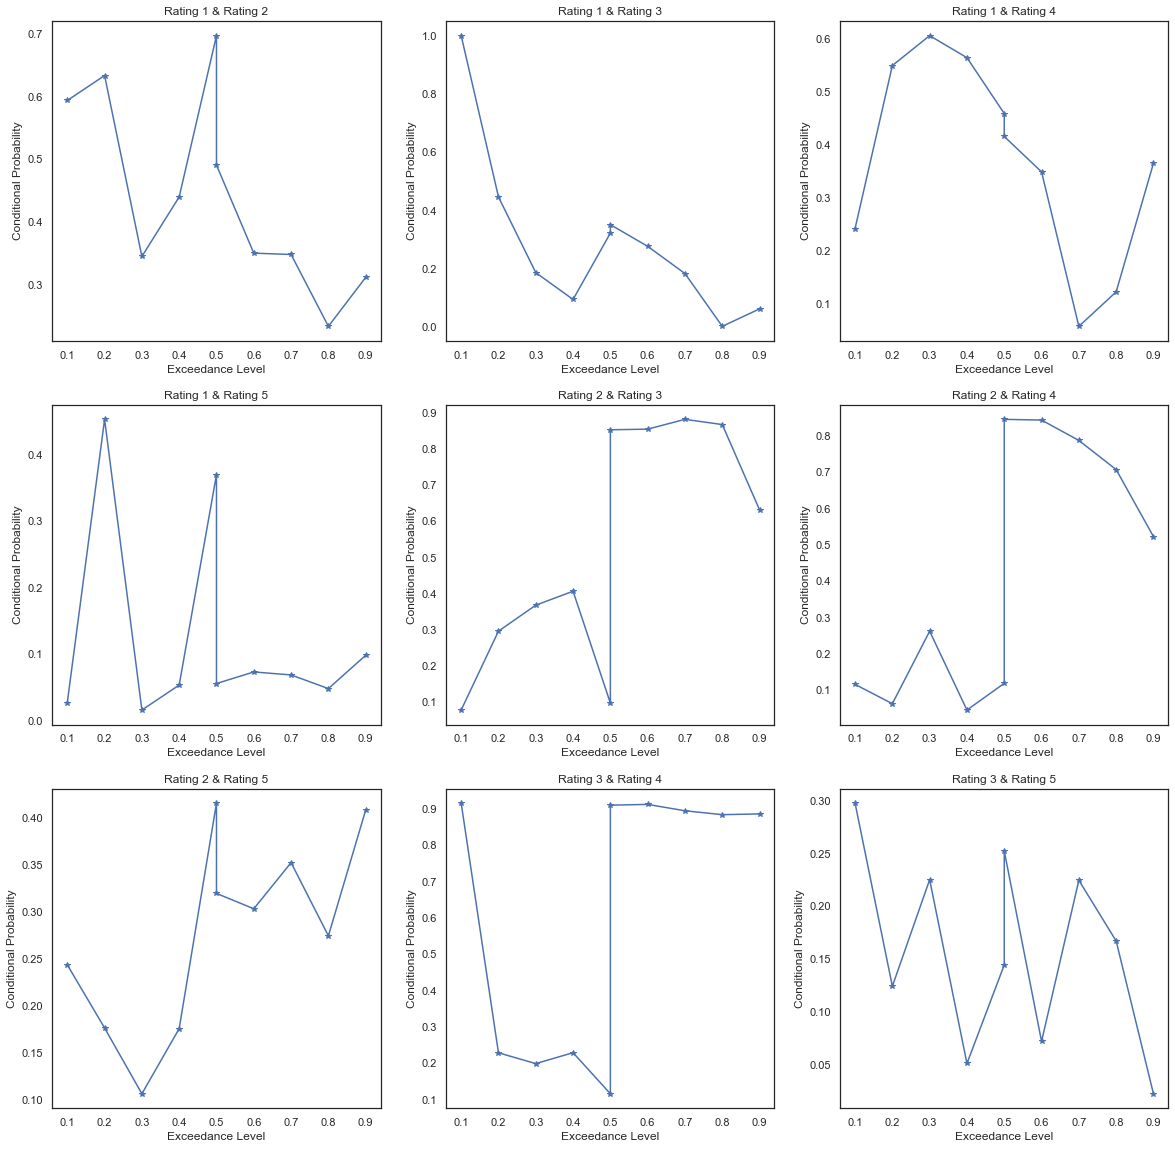

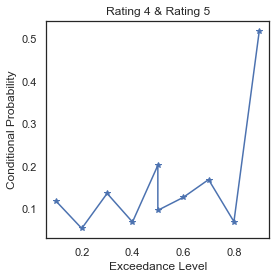

In [200]:
asymmetric_corr(data_df)

In [ ]:
def get_quantile_df(group_1, group_2, exceedance_level):
    if exceedance_level < 0.5:
        return data_df.loc[(data_df[group_1] < data_df[group_1].quantile(exceedance_level)) & (data_df[group_2] < data_df[group_2].quantile(exceedance_level)), [group_1, group_2]]
    elif exceedance_level > 0.5:
        return data_df.loc[(data_df[group_1] > data_df[group_1].quantile(exceedance_level)) & (data_df[group_2] > data_df[group_2].quantile(exceedance_level)), [group_1, group_2]]
    elif exceedance_level == 0.5:
        a = data_df.loc[(data_df[group_1] < data_df[group_1].quantile(exceedance_level)) & (data_df[group_2] < data_df[group_2].quantile(exceedance_level)), [group_1, group_2]]
        b = data_df.loc[(data_df[group_1] > data_df[group_1].quantile(exceedance_level)) & (data_df[group_2] > data_df[group_2].quantile(exceedance_level)), [group_1, group_2]]
        return a, b

In [238]:
def get_tail_dependence(group_1, group_2, exceedance_level, method):
    if method == 'lower':
        temp_df = data_df.loc[(data_df[group_2] < data_df[group_2].quantile(exceedance_level)), [group_1, group_2]]
    elif method =='upper':
        temp_df = data_df.loc[(data_df[group_2] > data_df[group_2].quantile(exceedance_level)), [group_1, group_2]]
    return temp_df.corr().values[0][1]
#     return temp_df

In [244]:
tail_dependence_df = pd.DataFrame(columns=['group_1', 'group_2', '10%', '20%', '30%', '70%', '80%', '90%'])
count = 0
for i, group_1 in enumerate(data_df.columns):
    
    for j, group_2 in enumerate(data_df.columns[i+1:]):
        row = [group_1, group_2]
        
        for exceedance_level in [0.1, 0.2, 0.3, 0.7, 0.8, 0.9]:

            if exceedance_level < 0.5:
                method = 'lower'
            elif exceedance_level > 0.5:
                method = 'upper'
            
            tail_dependence_value = get_tail_dependence(group_1, group_2, exceedance_level, method)
            row.append(tail_dependence_value)
            
        tail_dependence_df.loc[count, :] = row
        count += 1

In [243]:
data_df = initial_data_df.loc[:'20160101',:]

In [245]:
tail_dependence_df

group_1   group_2         10%        20%        30%        70%        80%  \
0  Rating 1  Rating 2   -0.338471  -0.183756   0.219119   0.287648   0.160138   
1  Rating 1  Rating 3   0.0846965  -0.144874   -0.19563    0.30637   0.278269   
2  Rating 1  Rating 4    0.392696    0.52009   0.437493   0.349218     0.1429   
3  Rating 1  Rating 5  -0.0508599     0.1852   0.121466  -0.263625  -0.276762   
4  Rating 2  Rating 3    0.178935  0.0264187   0.021994   0.764791   0.770803   
5  Rating 2  Rating 4   -0.329341   0.384832   0.404687   0.838736   0.818231   
6  Rating 2  Rating 5   -0.383076  -0.173763  -0.108489  -0.196492  -0.168135   
7  Rating 3  Rating 4   -0.140891   0.227143   0.310392   0.891421   0.906555   
8  Rating 3  Rating 5   -0.208034  0.0897706  0.0285319  0.0852724   0.153642   
9  Rating 4  Rating 5  0.00219078   0.216706  0.0992146 -0.0859661 -0.0336042   

         90%  
0   0.397851  
1   0.157176  
2  -0.340695  
3  -0.377249  
4   0.716437  
5   0.637157  
6  -0.176046  
7    0.87426  
8   0.127439  
9 -0.0984767

In [231]:
get_tail_dependence('Rating 1', 'Rating 2', 0.1, 'lower')

Rating 1  Rating 2
Date                          
2013-03-28 -0.698530 -0.681247
2013-03-29 -0.696860 -0.676780
2013-03-30 -0.696860 -0.676780
2013-03-31 -0.696860 -0.676780
2013-04-04 -0.699905 -0.674918
2013-04-10 -0.698553 -0.680050
2013-04-11 -0.698732 -0.684645
2013-04-12 -0.700596 -0.683149
2013-04-13 -0.700596 -0.683149
2013-04-14 -0.700596 -0.683149
2013-04-15 -0.699912 -0.678682
2013-04-17 -0.697221 -0.676047
2013-04-24 -0.700830 -0.680809
2013-04-25 -0.699626 -0.681870
2013-04-26 -0.699644 -0.683290
2013-04-27 -0.699644 -0.683290
2013-04-28 -0.699644 -0.683290
2013-04-30 -0.677303 -0.742364
2013-05-01 -0.674443 -0.735895
2013-05-02 -0.675697 -0.739040
2013-05-03 -0.675330 -0.740425
2013-05-04 -0.675330 -0.740425
2013-05-05 -0.675330 -0.740425
2013-05-06 -0.678402 -0.739925
2013-05-07 -0.681749 -0.742336
2013-05-08 -0.681504 -0.743759
2013-05-09 -0.680054 -0.727781
2013-05-10 -0.679565 -0.726711
2013-05-11 -0.679565 -0.726711
2013-05-12 -0.679565 -0.726711
...              ...       ...
2014-07-09 -0.714083 -0.698784
2014-07-10 -0.713218 -0.700935
2014-07-11 -0.713112 -0.697882
2014-07-12 -0.713112 -0.697882
2014-07-13 -0.713112 -0.697882
2014-07-14 -0.713612 -0.698601
2014-07-15 -0.714270 -0.681432
2014-07-16 -0.712998 -0.700610
2014-07-17 -0.712057 -0.697639
2014-07-18 -0.712414 -0.693735
2014-07-19 -0.712414 -0.693735
2014-07-20 -0.712414 -0.693735
2014-07-21 -0.711629 -0.692289
2014-07-22 -0.711067 -0.697285
2014-07-23 -0.712414 -0.700891
2014-07-24 -0.712458 -0.698729
2015-05-13 -0.723437 -0.678885
2015-05-14 -0.722828 -0.676236
2015-05-18 -0.722905 -0.679713
2015-05-19 -0.724403 -0.681254
2015-05-20 -0.724460 -0.684445
2015-05-21 -0.725081 -0.682374
2015-05-22 -0.725060 -0.677755
2015-05-23 -0.725060 -0.677755
2015-05-24 -0.725060 -0.677755
2015-05-25 -0.724242 -0.683311
2015-05-26 -0.722836 -0.679237
2015-05-27 -0.722688 -0.676974
2015-05-28 -0.721929 -0.674934
2015-08-11 -0.717270 -0.676841

[402 rows x 2 columns]

In [214]:
tail_dependence_df

group_1   group_2         10%        20%        30%        70%        80%  \
0  Rating 1  Rating 2   -0.338471  -0.183756   0.219119   0.287648   0.160138   
1  Rating 1  Rating 3   0.0846965  -0.144874   -0.19563    0.30637   0.278269   
2  Rating 1  Rating 4    0.392696    0.52009   0.437493   0.349218     0.1429   
3  Rating 1  Rating 5  -0.0508599     0.1852   0.121466  -0.263625  -0.276762   
4  Rating 2  Rating 3    0.178935  0.0264187   0.021994   0.764791   0.770803   
5  Rating 2  Rating 4   -0.329341   0.384832   0.404687   0.838736   0.818231   
6  Rating 2  Rating 5   -0.383076  -0.173763  -0.108489  -0.196492  -0.168135   
7  Rating 3  Rating 4   -0.140891   0.227143   0.310392   0.891421   0.906555   
8  Rating 3  Rating 5   -0.208034  0.0897706  0.0285319  0.0852724   0.153642   
9  Rating 4  Rating 5  0.00219078   0.216706  0.0992146 -0.0859661 -0.0336042   

         90%  
0   0.397851  
1   0.157176  
2  -0.340695  
3  -0.377249  
4   0.716437  
5   0.637157  
6  -0.176046  
7    0.87426  
8   0.127439  
9 -0.0984767

In [209]:
data_df.columns

Index(['Rating 1', 'Rating 2', 'Rating 3', 'Rating 4', 'Rating 5'], dtype='object')